In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
DATAFILE = "./dataset/weather_data.csv"
UNKNOWN_DATA = "./dataset/unknown_data.csv"
trainingDataset = pd.read_csv(DATAFILE)
unknownDataset =pd.read_csv(UNKNOWN_DATA)


In [3]:
trainingDataset.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [4]:
trainingDataset.shape

(99516, 23)

In [5]:
unknownDataset.shape

(42677, 22)

In [6]:
trainingDataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [7]:
trainingDataset.count().sort_values()

Sunshine         52199
Evaporation      56985
Cloud3pm         59514
Cloud9am         61944
Pressure9am      89768
Pressure3pm      89780
WindDir9am       92510
WindGustDir      92995
WindGustSpeed    93036
WindDir3pm       96868
Humidity3pm      97010
Temp3pm          97612
WindSpeed3pm     97681
Humidity9am      98283
Rainfall         98537
RainToday        98537
WindSpeed9am     98581
Temp9am          98902
MinTemp          99073
MaxTemp          99286
row ID           99516
Location         99516
RainTomorrow     99516
dtype: int64

## First, the RainToday attribute is an binary value where it only store Yes/No for answer. So I will manually binarise the RainToday attribute using replace() function in pd

## Drop these columns (Sunshine, Evaporation, Cloud3pm/9am) as they have to much NA value

In [8]:
trainingDataset = trainingDataset.drop(columns=['Sunshine','Evaporation','Cloud9am','Cloud3pm','row ID'],axis=1) 
unknownDataset = unknownDataset.drop(columns=['Sunshine','Evaporation','Cloud9am','Cloud3pm'],axis=1) 
print(trainingDataset.shape)
print(unknownDataset.shape) 

(99516, 18)
(42677, 18)


# Impute the data for the unknownDataset

In [9]:
def returnListOfNumericCols(data):
    numericColumns = []

    for col in data.columns:
        if(data[col].dtype == 'float64'): # if the type of the col is numeric
            numericColumns.append(col)

    return numericColumns

In [10]:
def return_categorical_columns(df):
    catCols = []
    for col in df.columns :
        if(df[col].dtypes == 'object'):
            catCols.append(col)
    return catCols

In [11]:
from sklearn.impute import SimpleImputer
 
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')
 
 
for col in returnListOfNumericCols(trainingDataset):
        trainingDataset[col] = imputer.fit_transform(trainingDataset[col].values.reshape(-1, 1))
        unknownDataset[col] = imputer.fit_transform(unknownDataset[col].values.reshape(-1, 1))
# Imputing the data    
 
print("Imputed Data : \n", unknownDataset)


Imputed Data : 
          row ID Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0          Row0   Albury     12.9     25.7       0.0         WSW   
1          Row1   Albury      9.2     28.0       0.0          NE   
2          Row2   Albury     14.3     25.0       0.0           W   
3          Row3   Albury      9.7     31.9       0.0         NNW   
4          Row4   Albury     15.9     18.6      15.6           W   
...         ...      ...      ...      ...       ...         ...   
42672  Row43633    Uluru      2.4     19.1       0.0           E   
42673  Row43634    Uluru      2.3     21.4       0.0          SE   
42674  Row43635    Uluru      2.6     22.5       0.0           S   
42675  Row43636    Uluru      7.4     20.6       0.0           E   
42676  Row43637    Uluru      7.8     27.0       0.0          SE   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0               46.0          W        WSW          19.0          26.0   
1               24

In [12]:
catImputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')

for col in return_categorical_columns(trainingDataset):
    trainingDataset[col] = catImputer.fit_transform(trainingDataset[col].values.reshape(-1, 1))
    unknownDataset[col] = catImputer.fit_transform(unknownDataset[col].values.reshape(-1, 1))

# Removing outliers

In [13]:
from scipy import stats
zscore = np.abs(stats.zscore(trainingDataset._get_numeric_data()))
trainingDataset= trainingDataset[(zscore < 3).all(axis=1)] # If Z score is below than Standard Deviation

In [14]:
trainingDataset.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Performing standardization the data

In [15]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

for col in returnListOfNumericCols(trainingDataset):
    scalerData = scaler.fit_transform(trainingDataset[col].values.reshape(-1, 1))
    scalerUnknownData = scaler.fit_transform(unknownDataset[col].values.reshape(-1, 1))
    
    trainingDataset[col] =  scalerData
    unknownDataset[col] = scalerUnknownData
print(trainingDataset.shape)
print(unknownDataset.shape)

(94628, 18)
(42677, 18)


In [16]:
trainingDataset.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,0.204475,-0.051249,-0.221288,W,0.435522,W,WNW,0.796001,0.709740,0.113113,-1.450971,-1.604171,-1.325052,-0.004579,0.011567,No,0
1,Albury,-0.742799,0.265637,-0.377757,WNW,0.435522,NNW,WSW,-1.157264,0.464528,-1.348046,-1.301398,-1.152919,-1.215662,0.042473,0.384396,No,0
2,Albury,0.851779,1.302718,-0.116976,W,0.180056,ENE,NW,-0.791027,0.219316,0.708400,-0.902534,-1.121798,-1.496951,0.136578,1.189707,No,0
3,Albury,0.393930,0.928217,-0.325601,WNW,1.457385,W,W,0.673922,0.709740,-0.752759,-1.401114,-1.370765,-1.590714,0.575736,1.070402,No,0
4,Albury,-0.695435,0.496099,-0.377757,W,-0.330875,SSE,W,-0.913106,-0.148502,-1.131578,-1.600545,-0.717227,-0.856237,-0.098685,0.563354,No,0


# Binarise the categories data

In [17]:
trainingDataset["RainToday"].replace({"No":0,"Yes":1},inplace = True)
unknownDataset["RainToday"].replace({"No":0,"Yes":1},inplace = True)



In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in return_categorical_columns(trainingDataset):
    trainingDataset[col] = label_encoder.fit_transform(trainingDataset[col])
    unknownDataset[col] = label_encoder.fit_transform(unknownDataset[col])


In [19]:
trainingDataset.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,0.204475,-0.051249,-0.221288,13,0.435522,13,14,0.796001,0.709740,0.113113,-1.450971,-1.604171,-1.325052,-0.004579,0.011567,0,0
1,2,-0.742799,0.265637,-0.377757,14,0.435522,6,15,-1.157264,0.464528,-1.348046,-1.301398,-1.152919,-1.215662,0.042473,0.384396,0,0
2,2,0.851779,1.302718,-0.116976,13,0.180056,1,7,-0.791027,0.219316,0.708400,-0.902534,-1.121798,-1.496951,0.136578,1.189707,0,0
3,2,0.393930,0.928217,-0.325601,14,1.457385,13,13,0.673922,0.709740,-0.752759,-1.401114,-1.370765,-1.590714,0.575736,1.070402,0,0
4,2,-0.695435,0.496099,-0.377757,13,-0.330875,10,13,-0.913106,-0.148502,-1.131578,-1.600545,-0.717227,-0.856237,-0.098685,0.563354,0,0


In [20]:
unknownDataset.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Row0,2,0.107664,0.345048,-0.277010,15,0.460943,13,15,0.567883,0.846481,-1.632082,-1.050313,-1.483403,-0.975261,0.613200,0.219417,0
1,Row1,2,-0.468892,0.668268,-0.277010,4,-1.211320,9,0,-0.338135,-1.102042,-1.261232,-1.730816,0.002462,-0.359481,0.165641,0.698750,0
2,Row2,2,0.325820,0.246677,-0.277010,13,0.764991,12,13,0.681135,0.617243,-1.049318,-1.584994,-1.186230,-1.050356,0.165641,0.422771,0
3,Row3,2,-0.390979,1.216337,-0.277010,6,3.045351,9,7,-0.791145,1.075719,-1.420168,-2.071068,-1.290240,-1.741230,0.196507,1.236184,0
4,Row4,2,0.575141,-0.652718,1.586107,13,1.601123,6,6,1.587154,1.075719,0.381101,2.011954,-3.459602,-3.333245,0.057609,-0.855450,1


# Splitting the data

In [21]:
X = trainingDataset.loc[:,trainingDataset.columns!='RainTomorrow']
y = trainingDataset.RainTomorrow

In [22]:
X.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Defying a function to evaluate perfoemance (f1 score, auc values, roc curve)

In [24]:
def evaluate_performance(classifier, X_test,y_test):
    y_probs = classifier.predict_proba(X_test)
    y_probs_class_1 = y_probs[:,1]

    auc = roc_auc_score(y_test, y_probs_class_1)    
    fpr, tpr, threshold = roc_curve(y_test, y_probs_class_1, pos_label=1)

    # configure the plot
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
            lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
    # set x and y axis labels 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    print("AUC: {}".format(auc))
    

# Decision Tree

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

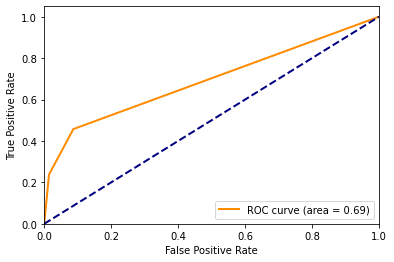

AUC: 0.692173373430131
82.97227799499807


0.36810457516339873

In [26]:
evaluate_performance(clf,X_test,y_test)
print(accuracy_score(y_test,y_pred) * 100)
f1_score(y_test,y_pred)


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

Ksclf = KNeighborsClassifier(n_neighbors = 10)
Ksclf.fit(X_train, y_train)
y_pred = Ksclf.predict(X_test)


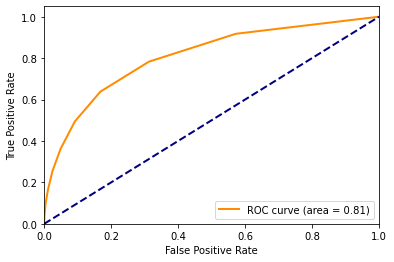

AUC: 0.8066099159724899
82.50378667793863


0.37639673571876964

In [28]:

evaluate_performance(Ksclf,X_test,y_test)
print(accuracy_score(y_test,y_pred) * 100)
f1_score(y_test,y_pred)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rdclf = RandomForestClassifier()
rdclf.fit(X_train, y_train)
y_pred = rdclf.predict(X_test)

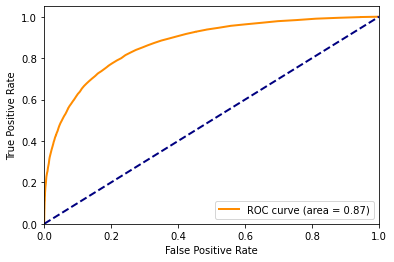

AUC: 0.8690718773128009
85.33939201803516


0.5605068637803591

In [30]:
evaluate_performance(rdclf,X_test,y_test)
print(accuracy_score(y_test,y_pred) * 100)
f1_score(y_test,y_pred)

# Hyperparameter tuning random forest with gridsearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
param_list = {
    'min_samples_leaf':[3,6,9,12,15,18,24], 
    'max_depth': [5,10,None], 
    'criterion' : ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
}
RFC = RandomForestClassifier(n_jobs=-1, random_state=42)
tunned_clf = GridSearchCV(RFC,param_list)
tunned_clf.fit(X_train, y_train)
y_pred = tunned_clf.predict(X_test)


In [ ]:
tunned_clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3}

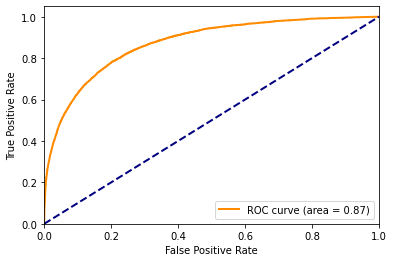

AUC: 0.8713992024446315
85.44858924231217


0.5641945352885325

In [ ]:
evaluate_performance(tunned_clf,X_test,y_test)
print(accuracy_score(y_test,y_pred) * 100)
f1_score(y_test,y_pred)

# SVM

In [ ]:
from sklearn.svm import SVC

SvmClf = SVC(probability=True)
SvmClf.fit(X_train, y_train)
y_pred = SvmClf.predict(X_test)


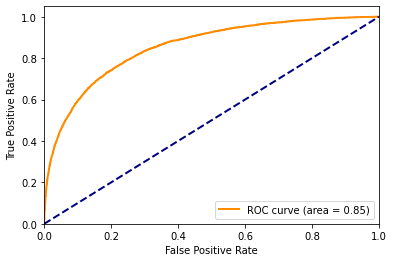

AUC: 0.8534843231756403
None
84.38127443728204


0.48964088397790057

In [ ]:
print(evaluate_performance(SvmClf,X_test,y_test))
print(accuracy_score(y_test,y_pred) * 100)
f1_score(y_test,y_pred)

# Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpClf = MLPClassifier(
    verbose=True,
    early_stopping=True,
)
mlpClf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 

Iteration 1, loss = 0.40470381
Validation score: 0.833937
Iteration 2, loss = 0.37022149
Validation score: 0.836051
Iteration 3, loss = 0.36617844
Validation score: 0.839674
Iteration 4, loss = 0.36229297
Validation score: 0.839372
Iteration 5, loss = 0.35920194
Validation score: 0.838315
Iteration 6, loss = 0.35730199
Validation score: 0.844203
Iteration 7, loss = 0.35833304
Validation score: 0.841335
Iteration 8, loss = 0.35429280
Validation score: 0.843448
Iteration 9, loss = 0.35424332
Validation score: 0.842995
Iteration 10, loss = 0.35374086
Validation score: 0.845109
Iteration 11, loss = 0.35234003
Validation score: 0.843750
Iteration 12, loss = 0.35102758
Validation score: 0.839825
Iteration 13, loss = 0.35127926
Validation score: 0.844052
Iteration 14, loss = 0.34974176
Validation score: 0.836353
Iteration 15, loss = 0.34936159
Validation score: 0.846618
Iteration 16, loss = 0.35015283
Validation score: 0.838164
Iteration 17, loss = 0.34893291
Validation score: 0.842844
Iterat

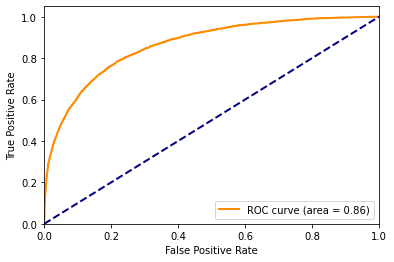

AUC: 0.8638467580975467
None
85.44154426010074


0.5913989125061789

In [ ]:
print(evaluate_performance(mlpClf,X_test,y_test))
print(accuracy_score(y_test,y_pred) * 100)
f1_score(y_test,y_pred)

# Hyperparameter tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpClf = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [( 50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
tuned_mlpClf = GridSearchCV(mlpClf, parameter_space, n_jobs=-1, cv=3)
tuned_mlpClf.fit(X_train, y_train) 
y_pred = tuned_mlpClf.predict(X_test) 



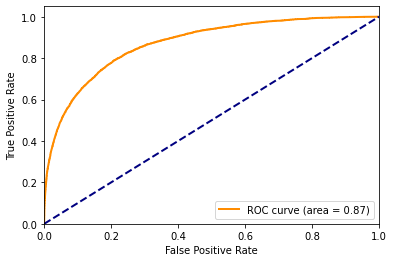

AUC: 0.8712571906962986
None
85.56130895769488


0.5937159282386757

In [ ]:
print(evaluate_performance(tuned_mlpClf,X_test,y_test))
print(accuracy_score(y_test,y_pred) * 100)
f1_score(y_test,y_pred)

In [ ]:
tuned_mlpClf.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

# Predict the unknown dataset

In [ ]:
prediction = tuned_mlpClf.predict(unknownDataset.loc[:,unknownDataset.columns!='row ID'])

predicted_values = pd.DataFrame(prediction,columns = ['Predict-RainTomorrow'], index=unknownDataset["row ID"])


In [ ]:
predicted_values.head()

,Predict-RainTomorrow
row ID,
Row0,0
Row1,0
Row2,0
Row3,0
Row4,1


# Export to CSV

In [ ]:
predicted_values.to_csv("./13717335.csv",index=True) 